In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import math
import random
import seaborn as sn 
from scipy.stats import multivariate_normal
from numpy.linalg import inv 

In [61]:
def generate_n_points(n):
    x = []
    for i in range(n):
        x.append(random.uniform(0.00,1.00))
    
    x = sorted(x)
    return x

In [62]:
def gaussian_function(x,mean,var):
    sig = math.sqrt(var)
    y=(1/(sig * math.sqrt(2*np.pi))) * ((np.exp([1])[0]) ** (-0.5 * (((x-mean)/sig) ** 2)))
    return y

In [63]:
def generate_n_points_with_gaussian_noise(n):
    x = []
    for i in range(n):
        x.append(random.uniform(0.00,1.00))
    x = sorted(x)

    y = []
    for i in x:
        gaussian_noise = np.random.normal(0,0.01)
        Y = math.sin(2 * np.pi * i) + gaussian_noise
        y.append(Y)
    
    return x,y

In [64]:
def kernel_function(x_query,x_n,x,var):
    sig = math.sqrt(var)
    s = 0

    for i in range(len(x)):
        s = s + gaussian_function(x_query - x[i], 0, sig**2)
    
    return gaussian_function(x_query-x_n, 0, sig**2) / s

In [65]:
def kernel_regression(x,t,x_query,var):
    s1 = 0
    s2 = 0
    sig = math.sqrt(var)

    for i in range(len(x)):
        s1 = s1 + kernel_function(x_query,x[i],x,sig**2) * t[i]
        s2 = s2 + kernel_function(x_query,x[i],x,sig**2) * (t[i] ** 2)

    return s1,sig**2 + s2-(s1 ** 2)


In [66]:
def call_kernel_regression_with_different_variances(x_train,y_train,x_test,sig):
    y_predicted = []
    mean_list = []
    var_list = []

    variance = sig ** 2

    for i in range(len(x_test)):
        mean,var = kernel_regression(x_train,y_train,x_test[i],variance)
        y_predicted.append(mean)
        mean_list.append(mean)
        var_list.append(var)
    
    return mean_list,var_list

In [67]:
def plot_graphs(x_train,y_train,x_test,mean_list,var_list,a,b,axis,sig):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    mean_list = np.array(mean_list)
    var_list = np.array(var_list)

    top_lim = mean_list + 2 * var_list
    bot_lim = mean_list - 2 * var_list

    y_test = []
    for i in range(len(x_test)):
        y_test.append(np.sin(2 * np.pi * x_test[i]))
    
    axis[a][b].plot(x_test,y_test,color='green',label='true')
    axis[a][b].plot(x_test,mean_list,color='blue',label='mean')
    axis[a][b].fill_between(x_test,top_lim,bot_lim,alpha=0.1, color='yellow')

    if x_train is not None:
        axis[a][b].plot(x_train, y_train , 'ro')
    
    axs[a][b].set_title('Sigma = ' + str(sig))

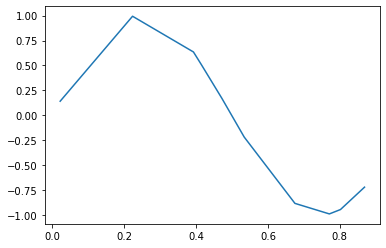

In [68]:
x_train,y_train = generate_n_points_with_gaussian_noise(10)
sn.lineplot(x=x_train,y=y_train)

x_test = generate_n_points(100)

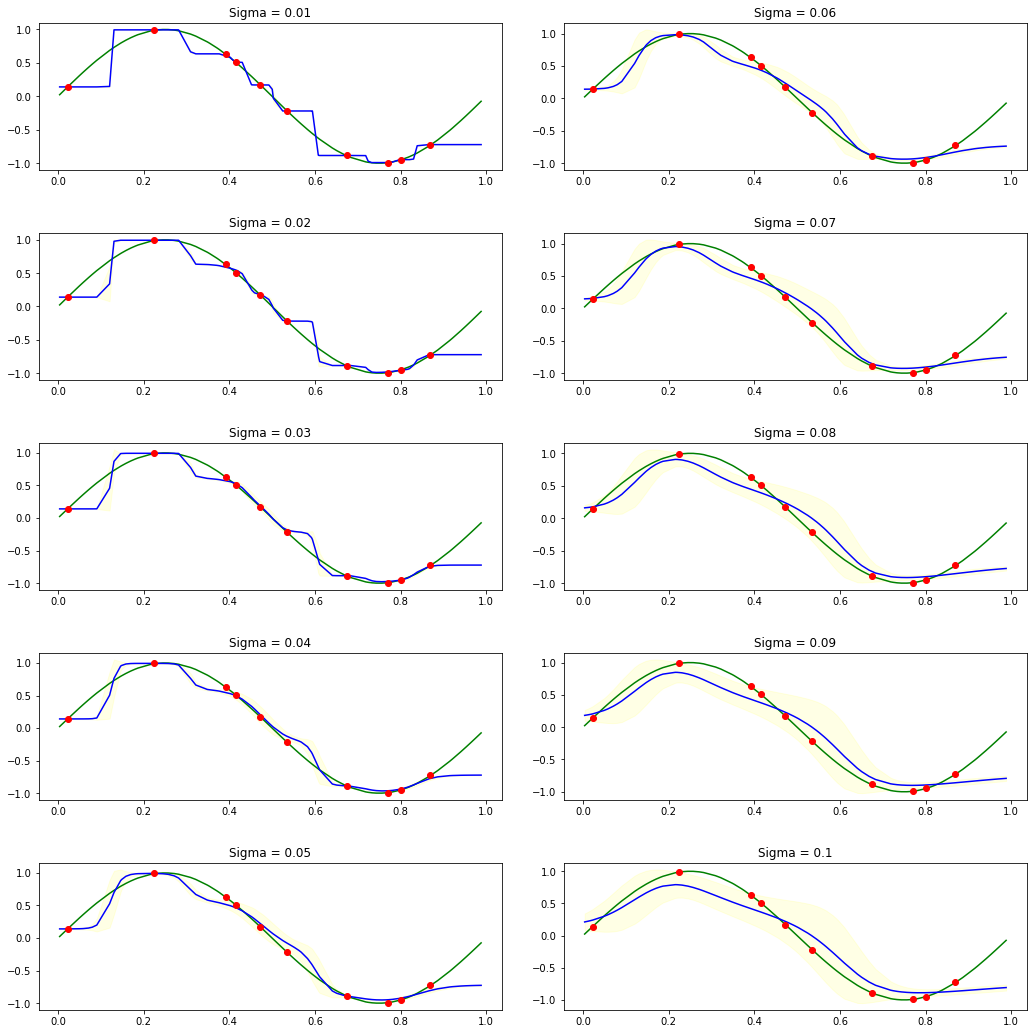

In [69]:
sigmas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08 , 0.09, 0.1]
fig,axs = plt.subplots(5,2)

for  i in range(len(sigmas)):
    mu_list,var_list=call_kernel_regression_with_different_variances(x_train,y_train,x_test,sigmas[i])
    if i<5:
        plot_graphs(x_train,y_train,x_test,mu_list,var_list,i,0,axs,sigmas[i])
    else:
        plot_graphs(x_train,y_train,x_test,mu_list,var_list,i-5,1,axs,sigmas[i])

fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=3.0)